<div style="font-size: 30px">
    
**Tariff plan prediction**

**Project Description**

It is necessary to conduct a preliminary analysis of the data of 500 customers of the tariff plans of Megaline, a federal mobile operator. Customers are offered two tariff plans: "Smart" and "Ultra". The analysis is carried out in order to adjust the advertising budget, the commercial department wants to understand which tariff brings more money.

**Description of tariffs:**

*Smart tariff:*

Monthly fee: 550 rubles
Included 500 minutes of conversation, 50 messages and 15 GB of Internet traffic
The cost of services in excess of the tariff package: 1. Minute of conversation: 3 rubles (Megaline always rounds up the values of minutes and megabytes. If the user spoke for only 1 second, the whole minute is counted in the tariff); 2. message: 3 rubles; 3. 1 GB of Internet traffic: 200 rubles.


*The "Ultra" tariff:*

Monthly fee: 1950 rubles
3000 minutes of conversation, 1000 messages and 30 GB of Internet traffic are included
The cost of services in excess of the tariff package: 1. minute of conversation: 1 ruble; 2. Message: 1 ruble; 3. 1 GB of Internet traffic: 150 rubles.

<h1>Table of contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item">
<li><span><a href="#Data uploading and initial examination">
    <span class="toc-item-num">1.&nbsp;&nbsp;</span>Data uploading and initial examination</a></span></li>
<li><span><a href="#Data preprocessing">
    <span class="toc-item-num">2.&nbsp;&nbsp;</span>Data preprocessing</a></span></li>
<li><span><a href="#Data analysis">
    <span class="toc-item-num">3.&nbsp;&nbsp;</span>Data analysis</a></span></li>
<li><span><a href="#Hypothesis testing">
    <span class="toc-item-num">4.&nbsp;&nbsp;</span>Hypothesis testing</a></span></li>
<li><span><a href="#Final conclusion">
    <span class="toc-item-num">5.&nbsp;&nbsp;</span>Final conclusion</a></span></li>
</ul></div>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

import warnings

In [2]:
# Disable Anaconda warnings
warnings.simplefilter('ignore')

# Default chart size
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

# Setting the maximum number of columns in the dateframe to be displayed
pd.set_option('display.max_columns',None)

# 1. Data uploading and initial examination

In [3]:
df_calls = pd.read_csv('calls.csv',sep=',')
df_internet = pd.read_csv('internet.csv',sep=',')
df_messages = pd.read_csv('messages.csv',sep=',')
df_tariffs = pd.read_csv('tariffs.csv',sep=',')
df_users = pd.read_csv('users.csv',sep=',')

In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Calls table (information about calls):**

id — unique call number

call_date — date of the call

duration — the duration of the call in minutes

user_id — ID of the user who made the call

In [5]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
df_calls.tail()

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [7]:
df_calls.sample(5)

,id,call_date,duration,user_id
62645,1158_203,2018-06-12,18.89,1158
131083,1335_560,2018-09-08,0.00,1335
47309,1118_598,2018-10-20,8.44,1118
131808,1339_137,2018-11-26,0.00,1339
97112,1247_435,2018-07-06,0.40,1247


**Conclusions on dataframe calls:**

1) The source data in the CSV file is initially separated by the sign ','.

2) There are no missing values

3) Changing the data type:

- call_date must be converted to datetime type
    

In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Internet table (information about internet sessions):**

id — unique session number

mb_used — the amount of Internet traffic spent per session (in megabytes)

session_date — date of the internet session

user_id — user ID

In [9]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
df_internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [11]:
df_internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
109607,109607,1373_529,387.21,2018-12-14,1373
80641,80641,1272_33,234.32,2018-09-16,1272
3524,3524,1011_391,586.45,2018-09-20,1011
84814,84814,1288_127,0.00,2018-11-20,1288
90480,90480,1307_97,377.35,2018-11-11,1307


**Conclusions on internet dataframe:**

1) The source data in the CSV file is initially separated by the sign ','.

2) There are no missing values

3) Changing the data type:

- session_date must be converted to datetime type

4) Unnamed:0 the column must be deleted

In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Messages table (information about messages):**

id — unique message number

message_date — date of the message

user_id — ID of the user who sent the message

In [13]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
df_messages.tail()

,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [15]:
df_messages.sample(5)

,id,message_date,user_id
71747,1302_575,2018-11-22,1302
11443,1048_89,2018-11-01,1048
63342,1277_19,2018-05-26,1277
94440,1385_1149,2018-12-12,1385
76359,1324_42,2018-11-05,1324


**Conclusions on dataframe messages:**

1) The source data in the CSV file is initially separated by the sign ','.

2) There are no missing values

3) Changing the data type:

- message_date must be converted to datetime type

In [16]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Tariffs table (information about tariffs):**

tariff_name — name of the tariff

rub_monthly_fee — monthly subscription fee in rubles

minutes_included — the number of minutes of conversation per month included in the subscription fee

messages_included — the number of messages per month included in the subscription fee

mb_per_month_included — the amount of Internet traffic included in the subscription fee (in megabytes)

rub_per_minute — the cost of a minute of conversation over the tariff package (for example, if the tariff has 100 minutes of conversation per month, then
a fee will be charged from 101 minutes)

rub_per_message — the cost of sending a message over the tariff package

rub_per_gb — the cost of an additional gigabyte of Internet traffic over the tariff package (1 gigabyte = 1024 megabytes)


In [17]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Conclusions on tariffs dataframe:**

1) The source data in the CSV file is initially separated by the sign ','.

2) There are no missing values. There is no need to make additional changes

In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Users table (user information):**

user_id — unique user ID

first_name — user name

last_name — last name of the user

age — user's age (years)

reg_date — tariff activation date (day, month, year)

churn_date — date of termination of use of the tariff (if the value is omitted, the tariff was still valid at the time of data upload)

city — the user's city of residence

tarif — name of the tariff plan

In [19]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [20]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [21]:
df_users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
369,1369,31,NaN,Краснодар,Валерий,Соловьев,2018-08-18,ultra
38,1038,31,NaN,Москва,Мария,Денисова,2018-10-07,smart
75,1075,25,NaN,Екатеринбург,Рафаэль,Никулин,2018-11-02,smart
411,1411,36,NaN,Грозный,Берта,Прокофьева,2018-07-13,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart


**Conclusions on users dataframe:**

1) The source data in the CSV file is initially separated by the sign ','.

2) There are a lot of missing values in the churn_rate column (due to the fact that users continued to use the tariff at the time of data upload)

3) Changing the data type:

- reg_date must be converted to datetime type

<div style="font-size: 20px">
    
**Intermediate conclusion:**

1) The source data in the CSV file is initially separated by the sign ','.
    
2) There are practically no missing values. Most dataframes require grouping by user_id

3) Some columns require changing the data type to datetime

4) To calculate revenue, it will be necessary to round up the duration of calls and Internet traffic

5) id columns are redundant (can be deleted)

# 2. Data preprocessing

<div style="font-size: 20px">

**Converting dates and forming columns with months**

In [22]:
# Converting columns with dates to the datetime type

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_users[['reg_date','churn_date']] = df_users[['reg_date','churn_date']].apply(pd.to_datetime, format = '%Y-%m-%d')

In [23]:
# Allocating a month to a separate column in df_calls, df_internet, df_messages
df_calls['month'] = df_calls['call_date'].values.astype('datetime64[M]')
df_internet['month'] = df_internet['session_date'].values.astype('datetime64[M]')
df_messages['month'] = df_messages['message_date'].values.astype('datetime64[M]')

<div style="font-size: 20px">

**Checking data for errors**

<div style="font-size: 18px">

Zero call duration

In [24]:
round(df_calls['duration'].describe(),2)

count    202607.00
mean          6.76
std           5.84
min           0.00
25%           1.30
50%           6.00
75%          10.70
max          38.00
Name: duration, dtype: float64

In [25]:
# Percentage of zero-duration calls
part = round(len(df_calls.query('duration == 0')) / len(df_calls['duration']),3)
print(f'Percentage of zero-duration calls is {part * 100} %')

Percentage of zero-duration calls is 19.6 %


Based on the fact that the proportion of rows with zeros is significant, it is necessary to check whether there is a relationship between all calls in the corresponding months and calls with zero values. If there is no dependency: filling in with average values or deleting rows is possible, otherwise it is impossible

In [26]:
df_calls_null = df_calls.query('duration == 0').groupby(by='month')['month'].count()
df_calls_all = df_calls.groupby(by='month')['duration'].count()
correlation = round(df_calls_null.corr(df_calls_all),5)
print(f'The correlation coefficient of lines (calls) with zero values by month to all is {correlation}')


The correlation coefficient of lines (calls) with zero values by month to all is 0.99966


Since the correlation coefficient is almost 1, the dependence is traced, therefore, it is impossible to delete rows with zero values, as well as replace them with average values 

<div style="font-size: 18px">

Zero size of Internet traffic


In [27]:
round(df_internet['mb_used'].describe(),2)

count    149396.00
mean        370.19
std         278.30
min           0.00
25%         138.19
50%         348.02
75%         559.55
max        1724.83
Name: mb_used, dtype: float64

In [28]:
# The share of zero-size Internet traffic
part = round(len(df_internet.query('mb_used == 0.0')) / len(df_internet['mb_used']),2)
print(f'The share of zero-size Internet traffic is {part * 100} %')

The share of zero-size Internet traffic is 13.0 %


In [29]:
df_internet_null = df_internet.query('mb_used == 0.0').groupby(by='month')['month'].count()
df_internet_all = df_internet.groupby(by='month')['mb_used'].count()
correlation = round(df_internet_null.corr(df_internet_all),5)
print(f'The correlation coefficient of rows (Internet traffic) with zero values by month to all is {correlation}')

The correlation coefficient of rows (Internet traffic) with zero values by month to all is 0.99953


Since the correlation coefficient is almost 1, the dependence is traced, therefore, it is impossible to delete rows with zero values, as well as replace them with average values  

<div style="font-size: 20px">

**Rounding up the duration of calls and Internet traffic (in accordance with the terms of the Megaline tariff)**

Since the billing of calls, as well as Internet traffic, involves rounding up (up to a minute and a megabyte, respectively), we will round these values, assuming that:

1) zero calls - unanswered calls or calls with a duration of several seconds (rounded up to 1 min.)

2) zero internet traffic - unused internet traffic or slightly used (rounded up to 1 MB)

In [30]:
# Let's round up the calls
df_calls['duration_adjusted'] = df_calls['duration'].apply(lambda x: 1 if x == 0 else np.ceil(x)).astype('int64')

In [31]:
# Let's round up internet traffic
df_internet['mb_used_adjusted'] = df_internet['mb_used'].apply(lambda x: 1 if x == 0.0 else np.ceil(x)).astype('int64')

<div style="font-size: 20px">

**Formation of a dataframe for further calculations**

In [32]:
# let's define the range of the months spread
min_month = df_users['reg_date'].min()
max_month = df_users['reg_date'].max()

# let's create a temporary table of the range of months for later merging
temp_month = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
temp_month.columns = ['month']
temp_month['key'] = 1
temp_month.head()

,month,key
0,2018-01-01,1
1,2018-02-01,1
2,2018-03-01,1
3,2018-04-01,1
4,2018-05-01,1


In [33]:
# creating a temporary customer table for later merging
temp_users = pd.DataFrame(df_users[['user_id', 'city', 'tariff']])
# adding a region attribute
temp_users['region'] = temp_users['city'].where(temp_users['city'] == 'Москва', 'не-Москва')
temp_users['key'] = 1
temp_users.head()

,user_id,city,tariff,region,key
0,1000,Краснодар,ultra,не-Москва,1
1,1001,Москва,smart,Москва,1
2,1002,Стерлитамак,smart,не-Москва,1
3,1003,Москва,ultra,Москва,1
4,1004,Новокузнецк,ultra,не-Москва,1


In [34]:
# merging tables
work_report = temp_users.merge(temp_month,on='key')
# deleting of the temporary column
work_report = work_report.drop(['key'], axis=1)
work_report.head()

,user_id,city,tariff,region,month
0,1000,Краснодар,ultra,не-Москва,2018-01-01
1,1000,Краснодар,ultra,не-Москва,2018-02-01
2,1000,Краснодар,ultra,не-Москва,2018-03-01
3,1000,Краснодар,ultra,не-Москва,2018-04-01
4,1000,Краснодар,ultra,не-Москва,2018-05-01


In [35]:
# number of calls made and minutes of conversation spent by month
calls_per_month = df_calls.groupby(['user_id','month'])['duration_adjusted'].agg(['count', 'sum']).reset_index()
calls_per_month.columns = ['user_id','month', 'calls_per_month', 'calls_month_duration_minutes']
calls_per_month.head()

,user_id,month,calls_per_month,calls_month_duration_minutes
0,1000,2018-05-01,22,164
1,1000,2018-06-01,43,187
2,1000,2018-07-01,47,346
3,1000,2018-08-01,52,418
4,1000,2018-09-01,58,478


In [36]:
# merging tables 
work_report = work_report.merge(calls_per_month,how='left',on=['user_id','month'])
work_report.head()

,user_id,city,tariff,region,month,calls_per_month,calls_month_duration_minutes
0,1000,Краснодар,ultra,не-Москва,2018-01-01,NaN,NaN
1,1000,Краснодар,ultra,не-Москва,2018-02-01,NaN,NaN
2,1000,Краснодар,ultra,не-Москва,2018-03-01,NaN,NaN
3,1000,Краснодар,ultra,не-Москва,2018-04-01,NaN,NaN
4,1000,Краснодар,ultra,не-Москва,2018-05-01,22.0,164.0


In [37]:
# calculation of the number of messages sent (by month)
messages_per_month = df_messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_per_month.columns = ['user_id','month', 'messages_per_month']

In [38]:
# merging tables
work_report = work_report.merge(messages_per_month,how='left',on=['user_id','month'])

In [39]:
# the amount of internet traffic consumed by month
internet_per_month = df_internet.groupby(['user_id','month'])['mb_used_adjusted'].sum().reset_index()
internet_per_month.columns = ['user_id','month', 'internet_per_month_mb']

In [40]:
# merging tables
work_report = work_report.merge(internet_per_month,how='left',on=['user_id','month'])

In [56]:
# deleting zero rows for months when customers were not subscribers
work_report = work_report.loc[(work_report['calls_month_duration_minutes'].notna() == True) | (work_report['messages_per_month'].notna() == True) | (work_report['internet_per_month_mb'].notna() == True)]
work_report.head()

,user_id,city,tariff,region,month,calls_per_month,calls_month_duration_minutes,messages_per_month,internet_per_month_mb
4,1000,Краснодар,ultra,не-Москва,2018-05-01,22.0,164.0,22.0,2257.0
5,1000,Краснодар,ultra,не-Москва,2018-06-01,43.0,187.0,60.0,23262.0
6,1000,Краснодар,ultra,не-Москва,2018-07-01,47.0,346.0,75.0,14017.0
7,1000,Краснодар,ultra,не-Москва,2018-08-01,52.0,418.0,81.0,14072.0
8,1000,Краснодар,ultra,не-Москва,2018-09-01,58.0,478.0,57.0,14583.0


<div style="font-size: 20px">

**Calculation of monthly revenue from each user**

**Smart tariff**

Monthly fee: 550 rubles Includes 500 minutes of conversation, 50 messages and 15 GB of Internet traffic The cost of services in excess of the tariff package: 1. Minute of conversation: 3 rubles (Megaline always rounds up the values of minutes and megabytes. If the user spoke for only 1 second, the whole minute is counted in the tariff); 2. message: 3 rubles; 3. 1 GB of Internet traffic: 200 rubles.

**The "Ultra" tariff**

Monthly fee: 1950 rubles Includes 3000 minutes of conversation, 1000 messages and 30 GB of Internet traffic The cost of services over the tariff package: 1. minute of conversation: 1 ruble; 2. Message: 1 ruble; 3. 1 GB of Internet traffic: 150 rubles.

To calculate the monthly revenue, it is necessary:

1) deduct from the number of calls, messages and Internet traffic of each user the free limit provided by the tariff

2) the resulting balance should be multiplied by the corresponding tariff indicator

3) add a monthly fee for the corresponding tariff

In [57]:
# Let's create a function for calculating monthly revenue from calls
def revenue_internet(tariff, internet_per_month_mb):
    
    # the amount of Internet traffic to be paid (1 GB = 1024 MB)
    gb_to_pay = max(0,
                    np.ceil((internet_per_month_mb - 
                     df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'mb_per_month_included'].values[0]) / 1024)
                   )
    
    # tariff for internet traffic
    rub_per_gb = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_gb'].values[0]  
    
    return gb_to_pay * rub_per_gb  


# calculation of monthly revenue from messages
work_report['revenue_internet'] = work_report.apply(lambda x: revenue_internet(x.tariff,
                                                                                 x.internet_per_month_mb),
                                                axis=1)


In [58]:
# creating a function for calculating monthly revenue from calls
def revenue_calls(tariff, calls_month_duration_minutes):
    
    # minutes of calls to be paid
    minutes_to_pay = max(0,
                         (calls_month_duration_minutes - 
                          df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'minutes_included'].values[0])
                        )
    
    # tariff for calls
    rub_per_minute = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_minute'].values[0]      
    
    return minutes_to_pay * rub_per_minute  


# calculation of monthly revenue from calls
work_report['revenue_calls'] = work_report.apply(lambda x: revenue_calls(x.tariff,
                                                        x.calls_month_duration_minutes), 
                                 axis=1)

In [59]:
# creating a function for calculating monthly revenue from messages
def revenue_messages(tariff, messages_per_month):
    
    # number of messages to be paid
    messages_to_pay = max(0,
                          (messages_per_month - 
                           df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'messages_included'].values[0])
                         )
    
    # tariff for messages
    rub_per_message = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_message'].values[0]    
    
    return messages_to_pay * rub_per_message  


# calculation of monthly revenue from messages
work_report['revenue_messages'] = work_report.apply(lambda x: revenue_messages(x.tariff,
                                                                     x.messages_per_month),
                                          axis=1)

In [60]:
# creating a function for calculating monthly revenue from the subscription fee
def revenue_month_fee(tariff, 
                 calls_month_duration_minutes,
                 messages_per_month,
                 internet_per_month_mb):

    if pd.notna(calls_month_duration_minutes) or pd.notna(messages_per_month) or pd.notna(internet_per_month_mb):
        rub_monthly_fee = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_monthly_fee'].values[0]
    else:
        rub_monthly_fee = 0
    
    return rub_monthly_fee * 1.0  


# calculation of monthly revenue from the subscription fee
work_report['revenue_month_fee'] = work_report.apply(lambda x: revenue_month_fee(x.tariff,
                                                        x.calls_month_duration_minutes,
                                                        x.messages_per_month, 
                                                        x.internet_per_month_mb), 
                                 axis=1)

In [61]:
# calculation of monthly revenue
work_report['revenue'] = (work_report['revenue_calls']+
                     work_report['revenue_messages']+
                     work_report['revenue_internet']+
                     work_report['revenue_month_fee']) * 1.0

In [62]:
work_report.head(10)

,user_id,city,tariff,region,month,calls_per_month,calls_month_duration_minutes,messages_per_month,internet_per_month_mb,revenue_internet,revenue_calls,revenue_messages,revenue_month_fee,revenue
4,1000,Краснодар,ultra,не-Москва,2018-05-01,22.0,164.0,22.0,2257.0,0.0,0.0,0.0,1950.0,1950.0
5,1000,Краснодар,ultra,не-Москва,2018-06-01,43.0,187.0,60.0,23262.0,0.0,0.0,0.0,1950.0,1950.0
6,1000,Краснодар,ultra,не-Москва,2018-07-01,47.0,346.0,75.0,14017.0,0.0,0.0,0.0,1950.0,1950.0
7,1000,Краснодар,ultra,не-Москва,2018-08-01,52.0,418.0,81.0,14072.0,0.0,0.0,0.0,1950.0,1950.0
8,1000,Краснодар,ultra,не-Москва,2018-09-01,58.0,478.0,57.0,14583.0,0.0,0.0,0.0,1950.0,1950.0
9,1000,Краснодар,ultra,не-Москва,2018-10-01,57.0,363.0,73.0,14717.0,0.0,0.0,0.0,1950.0,1950.0
10,1000,Краснодар,ultra,не-Москва,2018-11-01,43.0,344.0,58.0,14769.0,0.0,0.0,0.0,1950.0,1950.0
11,1000,Краснодар,ultra,не-Москва,2018-12-01,46.0,341.0,70.0,9829.0,0.0,0.0,0.0,1950.0,1950.0
22,1001,Москва,smart,Москва,2018-11-01,59.0,444.0,NaN,18460.0,800.0,0.0,0.0,550.0,1350.0
23,1001,Москва,smart,Москва,2018-12-01,63.0,430.0,NaN,14059.0,0.0,0.0,0.0,550.0,550.0


# 3. Data analysis

In [63]:
# distribution of customers by tariffs
users_number = df_users.groupby(by='tariff')['tariff'].count()

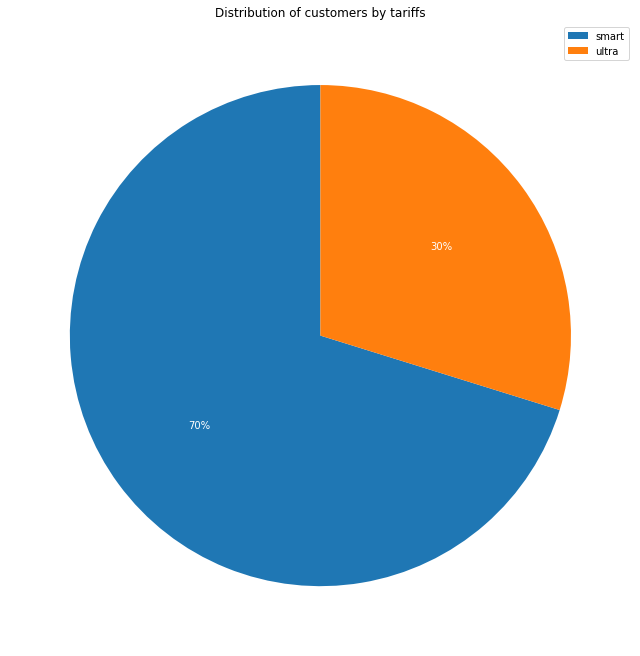

In [64]:
# graph of the distribution of customers by tariffs
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(users_number, autopct='%1.0f%%', startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
plt.tight_layout()
plt.title('Distribution of customers by tariffs')
plt.legend(users_number.index, loc='upper right')
plt.show()

In [65]:
# parameters for analyzing the behavior of the operator's clients
parameters = [['calls_per_month', 'Number of outgoing calls per month', 'Calls, number'],
              ['calls_month_duration_minutes','Duration of outgoing calls per month', 'Duration, minutes.'],
              ['messages_per_month', 'Number of messages sent per month', 'Messages, number'],
              ['internet_per_month_mb','The volume of Internet traffic per month', 'Volume, Gigabyte']
             ]

# the procedure for analyzing tariffs
tariffs_order = ['smart','ultra']

Parameter: Number of outgoing calls per month


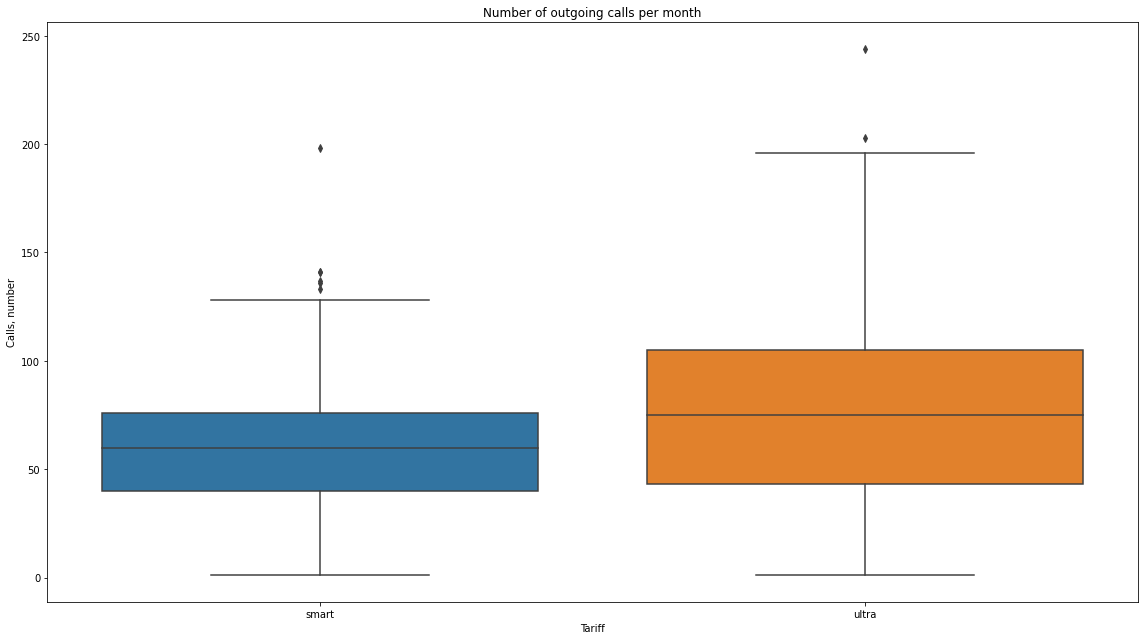

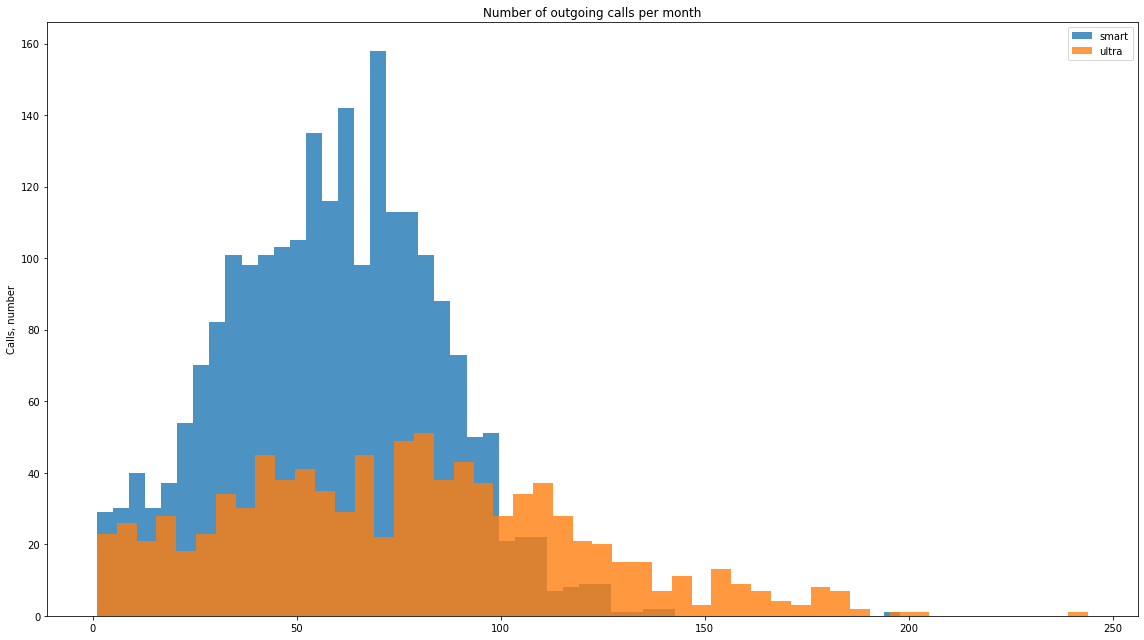


Tariff: "smart"
Parameter: Number of outgoing calls per month

Average: 58.6
Variance: 665.1
Standard deviation: 25.8

count    2223.000000
mean       58.621233
std        25.796101
min         1.000000
25%        40.000000
50%        60.000000
75%        76.000000
max       198.000000
Name: calls_per_month, dtype: float64


Tariff: "ultra"
Parameter: Number of outgoing calls per month

Average: 76.0
Variance: 1796.2
Standard deviation: 42.4

count    951.000000
mean      76.016824
std       42.403348
min        1.000000
25%       43.000000
50%       75.000000
75%      105.000000
max      244.000000
Name: calls_per_month, dtype: float64


--------------------


Parameter: Duration of outgoing calls per month


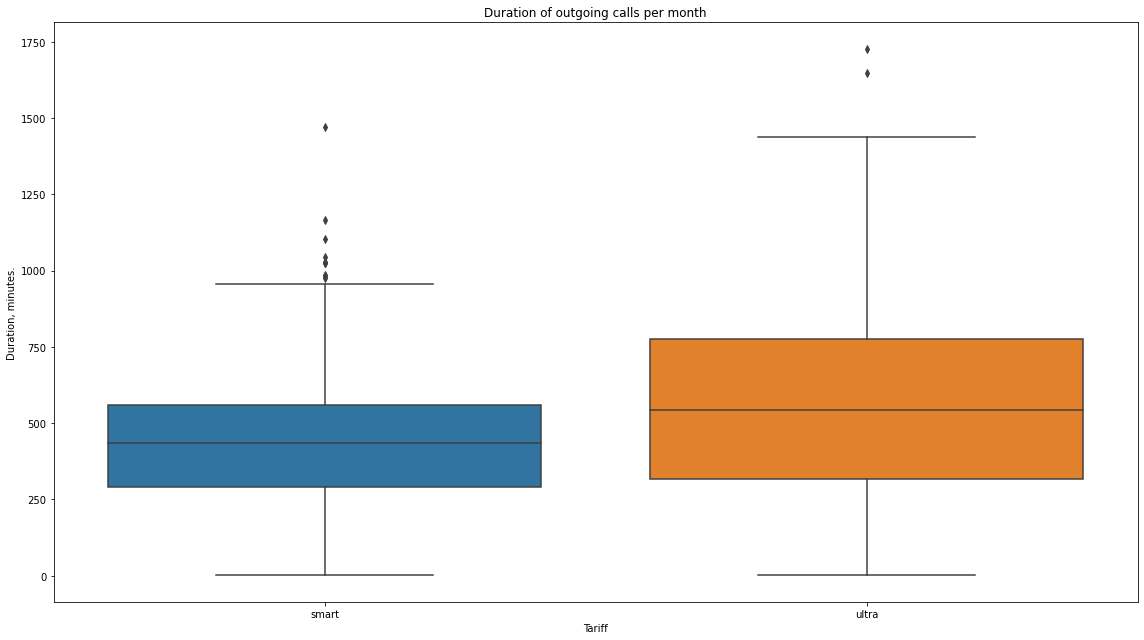

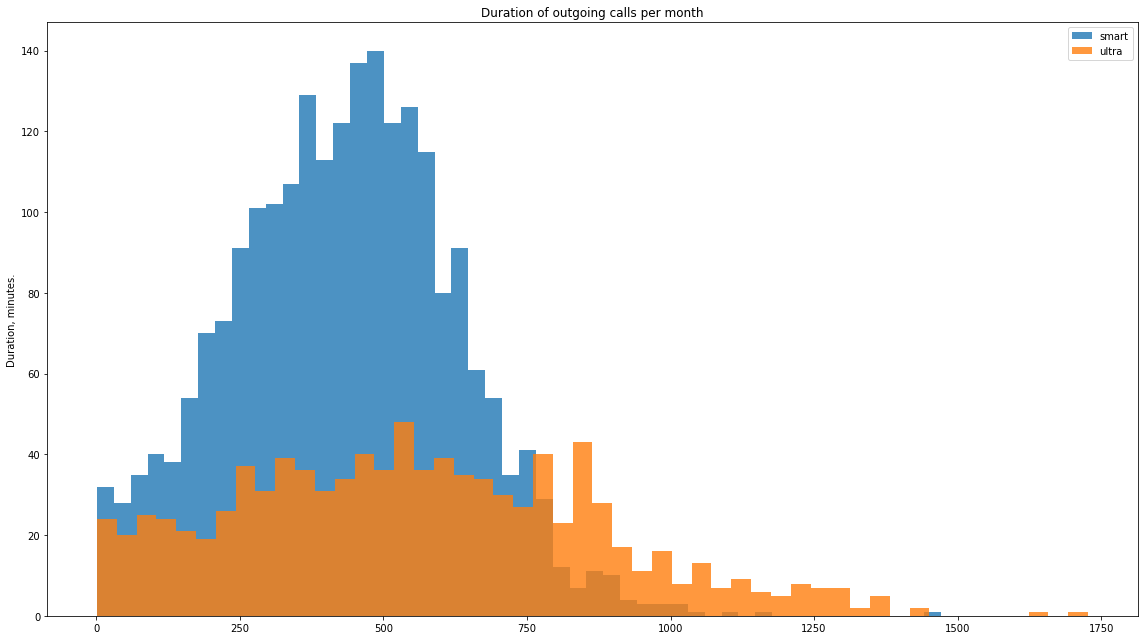


Tariff: "smart"
Parameter: Duration of outgoing calls per month

Average: 430.6
Variance: 37561.1
Standard deviation: 193.8

count    2223.000000
mean      430.609987
std       193.850373
min         1.000000
25%       292.000000
50%       435.000000
75%       561.000000
max      1471.000000
Name: calls_month_duration_minutes, dtype: float64


Tariff: "ultra"
Parameter: Duration of outgoing calls per month

Average: 560.1
Variance: 98958.5
Standard deviation: 314.6

count     951.000000
mean      560.113565
std       314.742170
min         1.000000
25%       318.000000
50%       544.000000
75%       776.500000
max      1727.000000
Name: calls_month_duration_minutes, dtype: float64


--------------------


Parameter: Number of messages sent per month


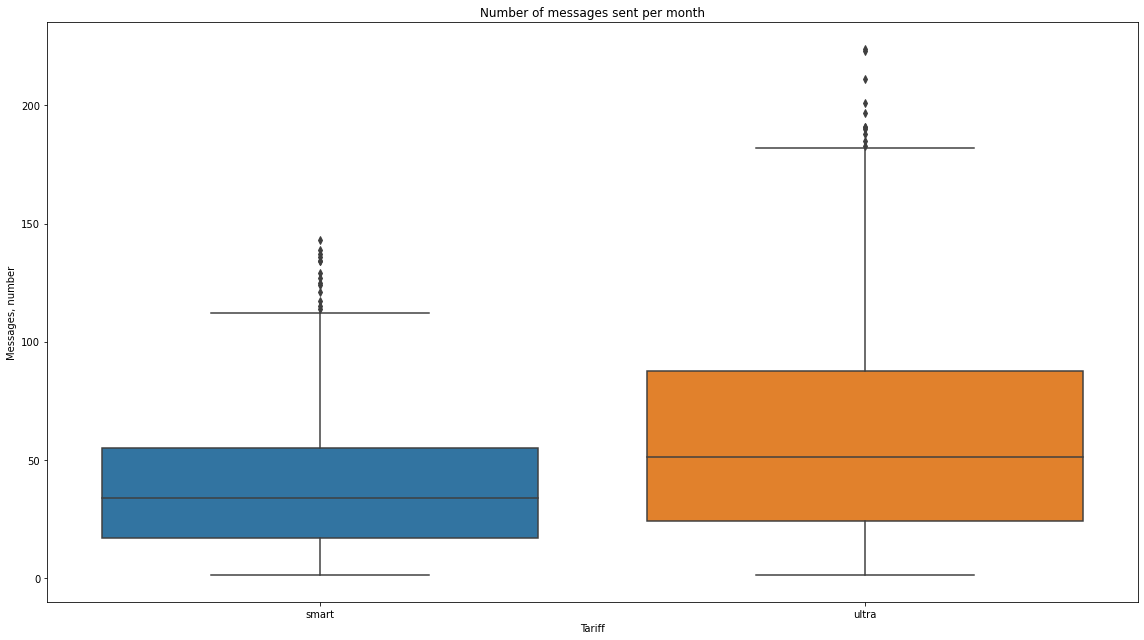

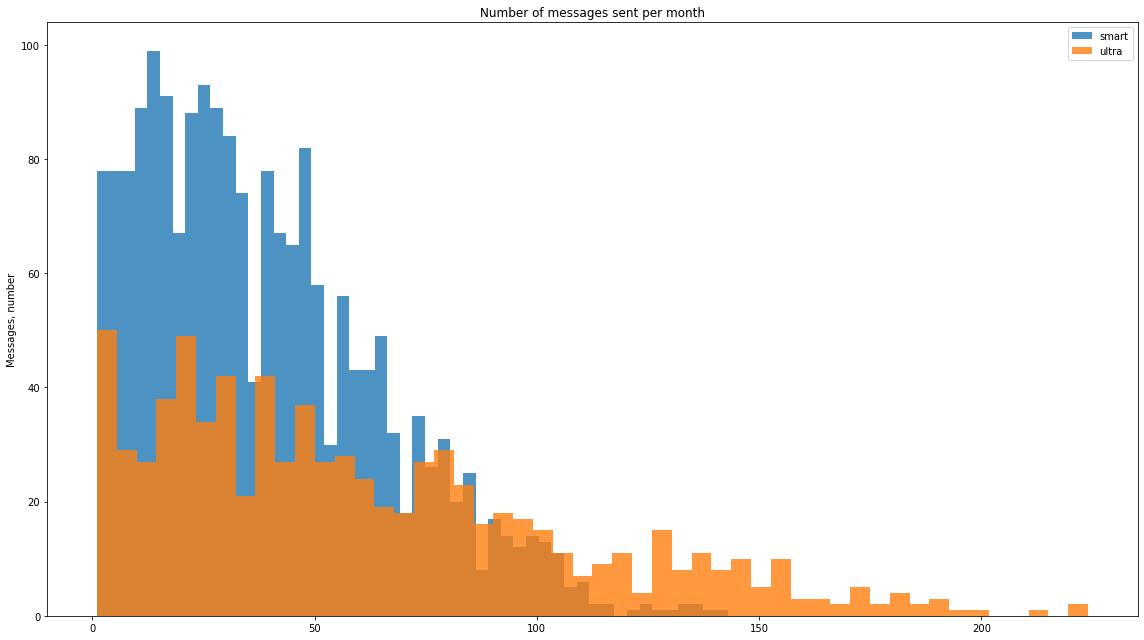


Tariff: "smart"
Parameter: Number of messages sent per month

Average: 38.7
Variance: 717.2
Standard deviation: 26.8

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_per_month, dtype: float64


Tariff: "ultra"
Parameter: Number of messages sent per month

Average: 61.2
Variance: 2107.0
Standard deviation: 45.9

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_per_month, dtype: float64


--------------------


Parameter: The volume of Internet traffic per month


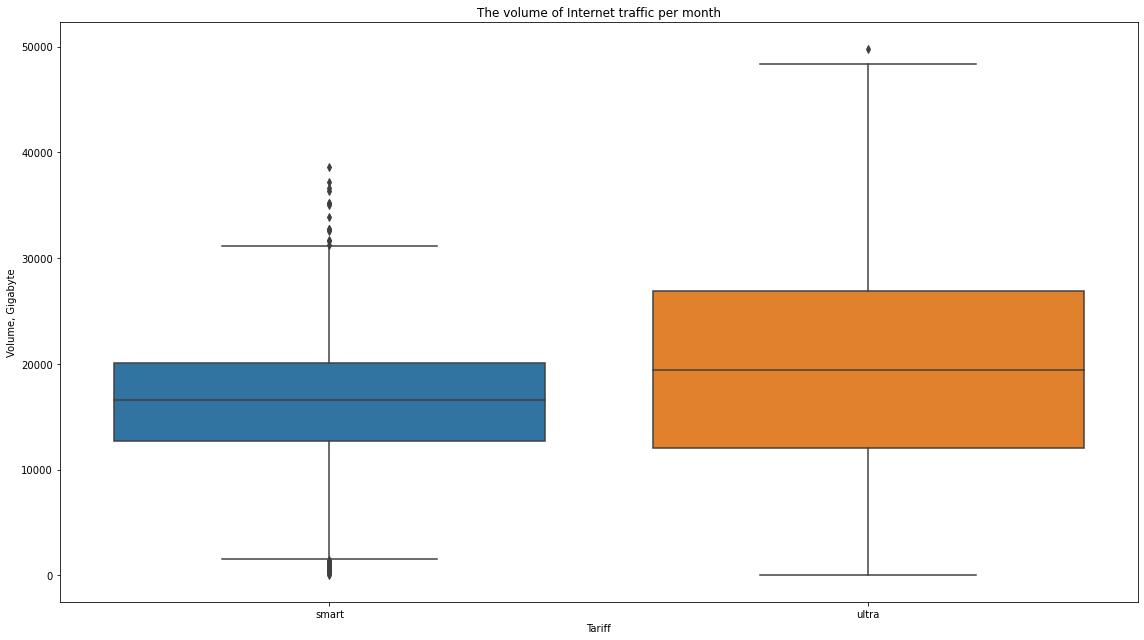

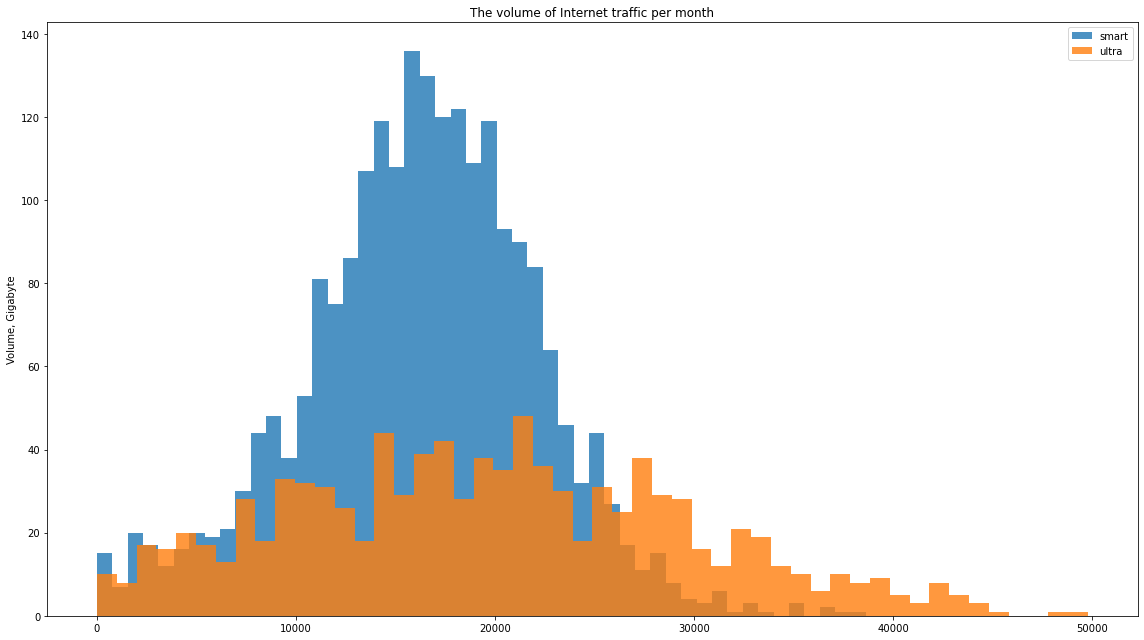


Tariff: "smart"
Parameter: The volume of Internet traffic per month

Average: 16244.5
Variance: 34453604.9
Standard deviation: 5869.7

count     2228.000000
mean     16244.472172
std       5871.037024
min          1.000000
25%      12673.250000
50%      16541.500000
75%      20078.750000
max      38627.000000
Name: internet_per_month_mb, dtype: float64


Tariff: "ultra"
Parameter: The volume of Internet traffic per month

Average: 19688.6
Variance: 98957235.8
Standard deviation: 9947.7

count      975.000000
mean     19688.587692
std       9952.830482
min          1.000000
25%      12022.000000
50%      19416.000000
75%      26921.500000
max      49793.000000
Name: internet_per_month_mb, dtype: float64


--------------------




In [66]:
# analysis of the behavior of the operator's clients
for parameter in parameters:
    print('Parameter: {}'.format(parameter[1]))

    # boxplot drawing
    sns.boxplot(x="tariff", 
                y=parameter[0],
                data=work_report,
                order = tariffs_order
               )
    plt.title(parameter[1])
    plt.xlabel('Tariff')
    plt.ylabel(parameter[2])
    plt.tight_layout()
    plt.show()
    print()
    

    # histogram drawing
    bins = 50
    plt.hist(
        work_report.query('tariff == "smart"')[parameter[0]],
        bins,
        alpha=0.8,
        label=('smart'),
            )
    plt.hist(
        work_report.query('tariff == "ultra"')[parameter[0]],
        bins,
        alpha=0.8,
        label=('ultra'),
    )
    plt.title(parameter[1])
    plt.ylabel(parameter[2])
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()  
    print()
    
    # calculation of the average quantity, variance and standard deviation
    for tariff_temp in tariffs_order:
        print('Tariff: "{}"'.format(tariff_temp))
        print('Parameter: {}'.format(parameter[1]))
        print() 
        

        # Average 
        mean_temp = np.mean(work_report.query('tariff == @tariff_temp')[parameter[0]])
        print('Average: {:.1f}'.format(mean_temp))
        # variance
        variance_temp = np.var(work_report.query('tariff == @tariff_temp')[parameter[0]])
        print('Variance: {:.1f}'.format(variance_temp))
        # standard deviation
        standard_deviation_temp = np.std(work_report.query('tariff == @tariff_temp')[parameter[0]])
        print('Standard deviation: {:.1f}'.format(standard_deviation_temp))
        
        
        print()      
        print(work_report.query('tariff == @tariff_temp')[parameter[0]].describe())
        print()
        print() 
    print('--------------------')
    print()
    print() 

In [68]:
statistics = work_report.pivot_table(index=['tariff'],
                                values=['calls_per_month',
                                        'calls_month_duration_minutes',
                                        'messages_per_month',
                                        'internet_per_month_mb'],
                                
                                aggfunc={'calls_per_month': [np.mean, np.var, np.std],
                                        'calls_month_duration_minutes': [np.mean, np.var, np.std],
                                        'messages_per_month': [np.mean, np.var, np.std],
                                        'internet_per_month_mb': [np.mean, np.var, np.std]}
                               )
statistics.T.astype('int')

tariff                                smart     ultra
calls_month_duration_minutes mean       430       560
                             std        193       314
                             var      37577     99062
calls_per_month              mean        58        76
                             std         25        42
                             var        665      1798
internet_per_month_mb        mean     16244     19688
                             std       5871      9952
                             var   34469075  99058834
messages_per_month           mean        38        61
                             std         26        45
                             var        717      2109

In [69]:
# distribution of revenue by tariffs
revenue_total = work_report.groupby(by='tariff')['revenue'].sum()

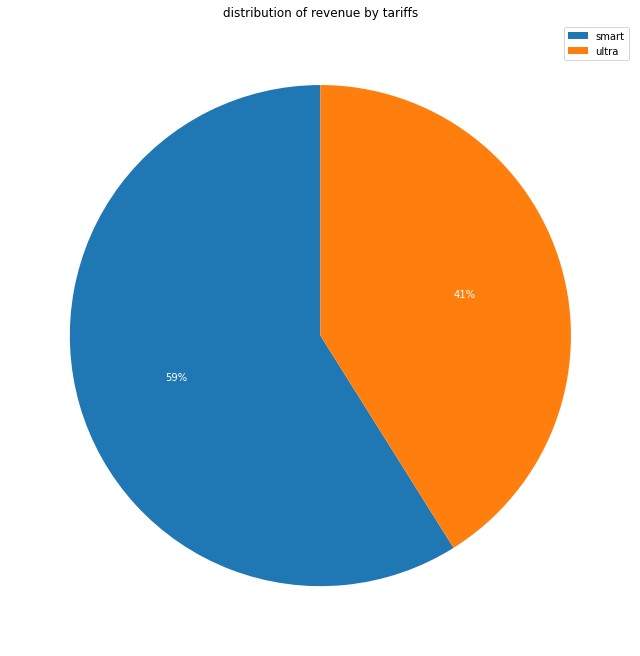

In [70]:
# graph of revenue distribution by tariffs
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(revenue_total, autopct='%1.0f%%', startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
plt.tight_layout()
plt.title('distribution of revenue by tariffs')
plt.legend(revenue_total.index, loc='upper right')
plt.show()

In [71]:
revenue = work_report.groupby(by='tariff')[['revenue_calls',
                                       'revenue_messages',
                                       'revenue_internet',
                                       'revenue_month_fee']].sum()


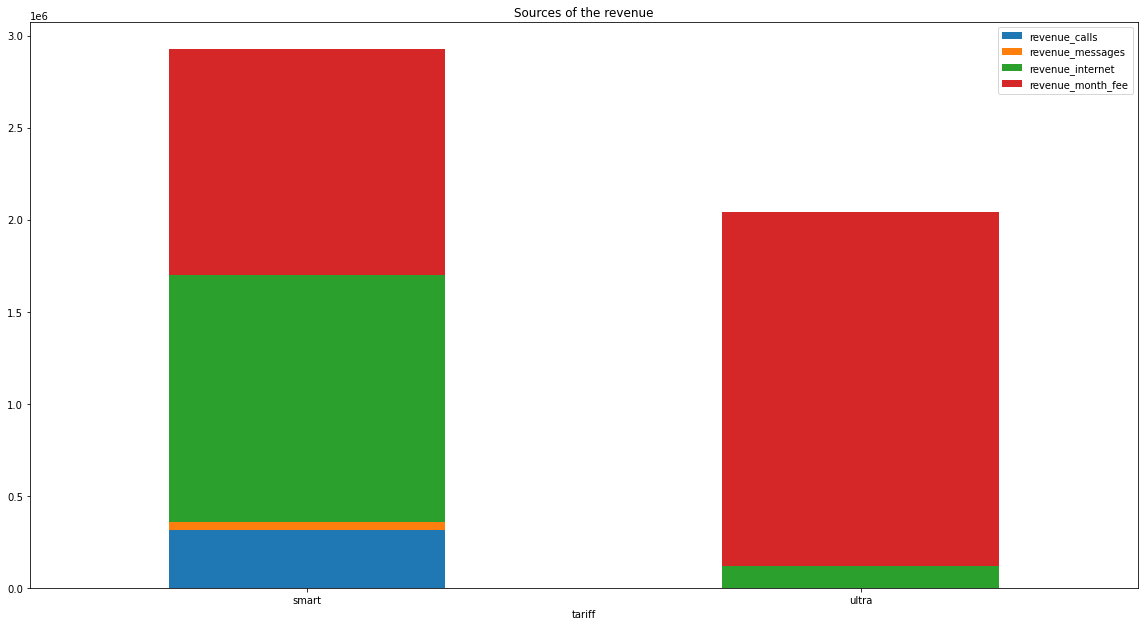

In [72]:
# formation of the X-axis
xticks=tariffs_order
x=range(len(xticks))

ax = revenue.plot(kind="bar", 
                  stacked=True
                                          )
plt.tight_layout()
plt.legend(loc='upper right')
plt.title('Sources of the revenue')

#plt.axis('off')
plt.xticks(x, xticks, rotation = 0)
plt.show()

In [73]:
# share of customers who consume services in excess of the package
for tariff in tariffs_order:
    extra_count = work_report.query('tariff == @tariff and (revenue_calls > 0 or revenue_messages > 0 or revenue_internet > 0)')['tariff'].count()
    tariff_count = work_report.query('tariff == @tariff')['tariff'].count()
    print('The percentage of customers on the tariff {} who consume services over the package {:.0%}'. format(tariff, extra_count / tariff_count))

The percentage of customers on the tariff smart who consume services over the package 75%
The percentage of customers on the tariff ultra who consume services over the package 14%


**Intermediate conclusion**

Distribution of customers by tariffs:

smart — 70 %;

ultra — 30 %.

On average, customers on the smart tariff call 59 times a month, and on the ultra tariff — 76.

The average duration of calls on the smart tariff is 431 minutes. per month, and on the ultra tariff — 560.

On average, customers on the smart tariff send 39 messages per month, and on the ultra tariff — 61.

On average, customers on the smart tariff consume 16 GB per month, and on the ultra tariff — 19.

Distribution of sample revenue by tariffs:

smart — 59 %,

ultra — 41 %.

The main volume of revenue is generated:

on the smart tariff, it is formed from paying for the Internet in excess of the package and the subscription fee.

on the ultra tariff, it is formed from the subscription fee.

# 4. Hypothesis testing

<div style="font-size: 20px">

**Calculation of monthly revenue from each user**

Formulation according to the task:

Check the hypotheses:
the average revenue of users of the "Ultra" and "Smart" tariffs differs

Since the task suggests comparing the average values of two samples, it is necessary to formulate and test the hypothesis about the equality of the averages of the two general aggregates.

Null hypothesis: the average revenue of customers of the "Ultra" and "Smart" tariffs are equal.
Alternative hypothesis: the average revenue of customers of the "Ultra" and "Smart" tariffs differ.
The critical level of statistical significance is 1%. The high threshold of statistical significance is set taking into account the importance and cost of the task.

In [74]:
# critical level of statistical significance
alpha = .01

results = st.ttest_ind(
    work_report.query('tariff == "smart"')['revenue'], 
    work_report.query('tariff == "ultra"')['revenue'], 
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

p-value: 1.2496710269965528e-233
We reject the null hypothesis


The resulting p-value indicates that with a probability close to 100%, the average revenue of customers of the "Ultra" and "Smart" tariffs are not equal.

In [75]:
# checking the conclusions
revenue_stat_general = work_report.query('revenue > 0').pivot_table(index=['tariff'],
                                values=['revenue_calls',
                                        'revenue_messages',
                                        'revenue_internet',
                                        'revenue'],
                                
                                aggfunc={'revenue_calls': [np.mean, np.var, np.std],
                                        'revenue_messages': [np.mean, np.var, np.std],
                                        'revenue_internet': [np.mean, np.var, np.std],
                                        'revenue': [np.mean, np.var, np.std]}
                               )
revenue_stat_general

revenue                            revenue_calls              \
               mean         std            var          mean         std   
tariff                                                                     
smart   1312.512337  830.938122  690458.161989    141.792732  272.753978   
ultra   2071.065990  378.802377  143491.240560      0.000000    0.000000   

                     revenue_internet                             \
                 var             mean         std            var   
tariff                                                             
smart   74394.732604       603.319874  740.522231  548373.174564   
ultra       0.000000       121.065990  378.802377  143491.240560   

       revenue_messages                          
                   mean        std          var  
tariff                                           
smart         17.399731  40.327368  1626.296607  
ultra          0.000000   0.000000     0.000000

<div style="font-size: 20px">

**Calculation of monthly revenue from each user**

Formulation according to the task:

Check the hypotheses:
the average revenue of users from Moscow differs from the revenue of users from other regions;

Since the task suggests comparing the average values of two samples, it is necessary to formulate and test the hypothesis about the equality of the averages of the two general aggregates.

Null hypothesis: the average revenue of customers from Moscow and other regions are equal.
Alternative hypothesis: the average revenue of customers from Moscow and other regions differ. The critical level of statistical significance is 1%. The high threshold of statistical significance is set taking into account the importance and cost of the task.

In [76]:
# critical level of statistical significance
alpha = .01

results = st.ttest_ind(
    work_report.query('region == "Москва"')['revenue'], 
    work_report.query('region != "Москва"')['revenue'], 
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

p-value: 0.560259602740345
It was not possible to reject the null hypothesis


The resulting p-value indicates that, with a probability of 56%, the average revenue of customers from Moscow and other regions is equal.

In [78]:
revenue_stat_region = work_report.query('revenue > 0').pivot_table(index=['region'],
                                values=['revenue_calls',
                                        'revenue_messages',
                                        'revenue_internet',
                                        'revenue'],
                                
                                aggfunc={'revenue_calls': [np.mean, np.var, np.std],
                                        'revenue_messages': [np.mean, np.var, np.std],
                                        'revenue_internet': [np.mean, np.var, np.std],
                                        'revenue': [np.mean, np.var, np.std]}
                               )
revenue_stat_region.T.astype('int')

region                 Москва  не-Москва
revenue          mean    1561       1541
                 std      753        814
                 var   567332     663465
revenue_calls    mean      84        101
                 std      208        242
                 var    43545      58716
revenue_internet mean     403        467
                 std      627        701
                 var   393847     491761
revenue_messages mean       7         13
                 std       25         36
                 var      668       1309

# 5. Final conclusion

**The most promising tariff is "Smart":**

59% of revenue is generated from the Smart tariff.

The average revenue from the Smart tariff is 1,313 rubles/month from the client.

The Smart tariff is used by 70% of customers.

On the "Smart" tariff, 75% of customers consume services over the package.

The consumption of services in excess of the package generates 54% of revenue on the "Smart" tariff.

In addition to the package, all services are consumed on the "Smart" tariff. 46% of the revenue on the tariff comes from the Internet and 10% from calls.

The "Ultra" tariff is less promising:

41% of revenue is generated from the "Ultra" tariff.

The average revenue from the "Ultra" tariff is 2,071 rubles/month from the client.

The "Ultra" tariff is used by 30% of customers.

Only 14% of customers on the "Ultra" tariff consume services in excess of the 14% package (Internet only) and this generates only 5% of the revenue from the tariff.

The average revenue from tariffs differs with a probability (p-value) of about <99.99%.

Average revenue by city is almost equal with a probability (p-value) of about 56 %:

Moscow 1,561 rubles/month from the client,

non-Moscow 1,541 rubles/month from the client.

Quantitative indicators:

Number of calls, pcs./month.:

"Smart" — 59,

"Ultra" — 76.

Average duration of calls, min. per month:

Smart — 431,

"Ultra" — 560.

Sent messages, pcs./month.:

"Smart" — 39,

"Ultra" — 61.

Internet traffic consumption, Gb/month:

"Smart" — 16,

"Ultra" — 19.